# Import necessary libraries

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [ ]:
pip install mahotas

     |████████████████████████████████| 5.7MB 12.6MB/s 


In [ ]:
pip install Augmentor

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D 
from tensorflow.keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard, LambdaCallback
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import pandas as pd
from imutils import paths
from skimage import io
from pathlib import Path
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import argparse
import cv2
import os
import random
import skimage
from skimage import data  
from skimage.io import imread, imsave, imshow
from skimage import filters
from skimage.util import crop
import glob
import mahotas as mt
from sklearn.svm import LinearSVC
from google.colab.patches import cv2_imshow
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn import neural_network
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize


In [ ]:
from keras import backend as K
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Lambda
from keras.layers import Flatten
from keras.layers import Reshape
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import AveragePooling2D
from keras.layers import BatchNormalization
from keras.layers.merge import add, concatenate
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


# Define main functions and import datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Function to divide images from the negative set into boxes with dimension 80 * 80 * 4

def crop(image_dataset, images_label,height, width):

  list_images=[]
  negative_labels=[]
  boxes=[]
  for im, lb in zip(image_dataset, images_label):
    imgwidth = im.shape[0]
    imgheight = im.shape[1]
    for i in range(0,imgheight,height):
      for j in range(0,imgwidth,width):
          negative_labels.append(lb+"_"+str(i)+"_"+str(j))
          box=(j, j+width, i, i+height)
          boxes.append(box)
          a = im[j:j+width, i: i+height]
          list_images.append(a)
  return list_images, boxes, negative_labels




#Function to load test_set

def load_positive_test_set(Paths1):
  imagePaths1 = list(paths.list_images(Paths1))

  data_mines = []
  labels_mines = []

  for imagePath1 in imagePaths1:
    image1 = imread(imagePath1)
    label1 = imagePath1.split(os.path.sep)[-1]
    label_name1=label1.split('_', 2)[2]
    final_label1='positive_id_'+label_name1.split(".")[0]
        
    data_mines.append(image1)
    labels_mines.append(final_label1)

   

  return data_mines, labels_mines


def load_negative_test_set(Paths2):
  imagePaths2 = list(paths.list_images(Paths2))

  data_no_mines = []
  labels_no_mines = []
  
  for imagePath2 in imagePaths2:
    image2 = imread(imagePath2)
    label2 = imagePath2.split(os.path.sep)[-1]
    label_name2=label2.split('_', 2)[2]
    final_label2='negative_id_'+label_name2.split(".")[0]    
    data_no_mines.append(image2)
    labels_no_mines.append(final_label2)

  return data_no_mines, labels_no_mines

#Function to crop images in test_set
def crop_test_set(test_dataset, images_label,height, width):
  
  list_images=[]
  test_labels=[]
  boxes=[]
  for im, lb in zip(test_dataset, images_label):
    #im = Image.open(input)
    imgwidth = im.shape[0]
    imgheight = im.shape[1]
    for i in range(0,imgheight,height):
      for j in range(0,imgwidth,width):
        test_labels.append(lb+"_"+str(i)+"_"+str(j))
        box=(j, j+width, i, i+height)
        boxes.append(box)
        a = im[j:j+width, i: i+height]
        list_images.append(a)
  return list_images, boxes, test_labels

#function to get the root of the label
def get_root_of_lables(image_label):

  image_label1=image_label.split('_', 2)[0]

  return image_label1

def predict_on_validation_test_svm(model, X_VALID, Y_VALID):

  predictions=model.predict(X_VALID)
  
  array_predictions_model=np.argmax(predictions, axis=1)
  
  print(classification_report(Y_VALID, array_predictions_model))
  
  cm= confusion_matrix(Y_VALID, array_predictions_model)
  sns.set(font_scale=1.4)
  sns.heatmap(cm, square=True, annot=True,annot_kws={"size": 12})
  plt.xlabel('predicted value')
  plt.ylabel('true value');

def predict_on_testset(model, X_TEST, Y_TEST):

  predictions=model.predict(X_TEST)
  array_predictions_model=np.argmax(predictions, axis=1)
  
  print(classification_report(Y_TEST[:,1], array_predictions_model))
  
  cm= confusion_matrix(Y_TEST[:,1], array_predictions_model)
  sns.set(font_scale=1.4)
  sns.heatmap(cm, square=True, annot=True,annot_kws={"size": 12})
  plt.xlabel('predicted value')
  plt.ylabel('true value');

#Function for extracting features to pass to SVM

def extract_features(image):
	# calculate haralick texture features for 4 types of adjacency
	textures = mt.features.haralick(image)

	# take the mean of it and return it
	ht_mean  = textures.mean(axis=0)
	return ht_mean



In [ ]:
#Main paths to folders 

mines = '/content/drive/My Drive/TrainingData/Cropped_images_2/'

no_mines= '/content/drive/My Drive/TrainingData/negative/'

test_positive= "/content/drive/MyDrive/TrainingData/test_set/Positive/"

test_negative= "/content/drive/MyDrive/TrainingData/test_set/Negative/"

In [ ]:
""" Look over the images in our dataset 
and then initialize our data and labels list
"""

imagePaths1 = list(paths.list_images(mines))
imagePaths2 = list(paths.list_images(no_mines))

data_mines = []
labels_mines = []

data_no_mines = []
labels_no_mines = []


# Loop over the positive samples
for imagePath1 in imagePaths1:

    label1 = imagePath1.split(os.path.sep)[-1]
    label_name1=label1.split('_', 2)[2]
    final_label1='positive_id_'+label_name1.split(".")[0]
    """ 
    Load the image, swap color channels, and resize it to be a fixed
    224x224 pixels while ignoring aspect ratio . This will make the images
    equal in size so that they are ready for our CNN
    """

    image1 = imread(imagePath1)
    #image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

    # Update the data and labels lists, respectively
    data_mines.append(image1)
    labels_mines.append(final_label1)
 
# Loop over the negative sampels
for imagePath2 in imagePaths2:

    label2 = imagePath2.split(os.path.sep)[-1]
    #label_name2=label2.split('_', 2)[1]
    final_label2='negative_id_'+label2 #label_name2.split(".")[0]
    """ 
    Load the image, swap color channels, and resize it to be a fixed
    224x224 pixels while ignoring aspect ratio . This will make the images
    equal in size so that they are ready for our CNN
    """
    image2 = imread(imagePath2)
    #image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

    # Update the data and labels lists, respectively
    data_no_mines.append(image2)
    labels_no_mines.append(final_label2)
 


print("Number of observation in positive dataset")
print(len(data_mines))
print(len(labels_mines))

print(" ")
print("Number of observation in negative")
print(len(data_no_mines))
print(len(labels_no_mines))

Number of observation in positive dataset
66
66
 
Number of observation in negative
329
329


In [ ]:
negative_set=crop(data_no_mines, labels_no_mines, 80, 80)

In [ ]:
#select 2 images every per sets of 64 elements 
#for a total of 180 sub-images; then take a random number of 14 remaining images to balance the negative
# and positive images in the trainset/valid set

select_negative_images=negative_set[0] #[5::10] #+ negative_set[0][29::70]

select_negative_labels=negative_set[2] #[5::10] #+ negative_set[2][29::70]

#ensure that there are no double counts
print(len(np.unique([select_negative_labels])))

21056


In [ ]:
from sklearn import preprocessing

tot_dataset=data_mines+select_negative_images
tot_labels=labels_mines+select_negative_labels
#Convert the data and labels to NumPy arrays while scaling the pixel intensities to the range [0, 1]

labels_arr_a=[x.split("_")[0] for x in tot_labels]

labels_arr = np.array(labels_arr_a)

dataset_arr= np.array(tot_dataset) 

lb = preprocessing.LabelBinarizer()
arr_lab=np.array(labels_arr_a)
labels_lb = lb.fit_transform(arr_lab)
labels_lb = to_categorical(labels_lb)

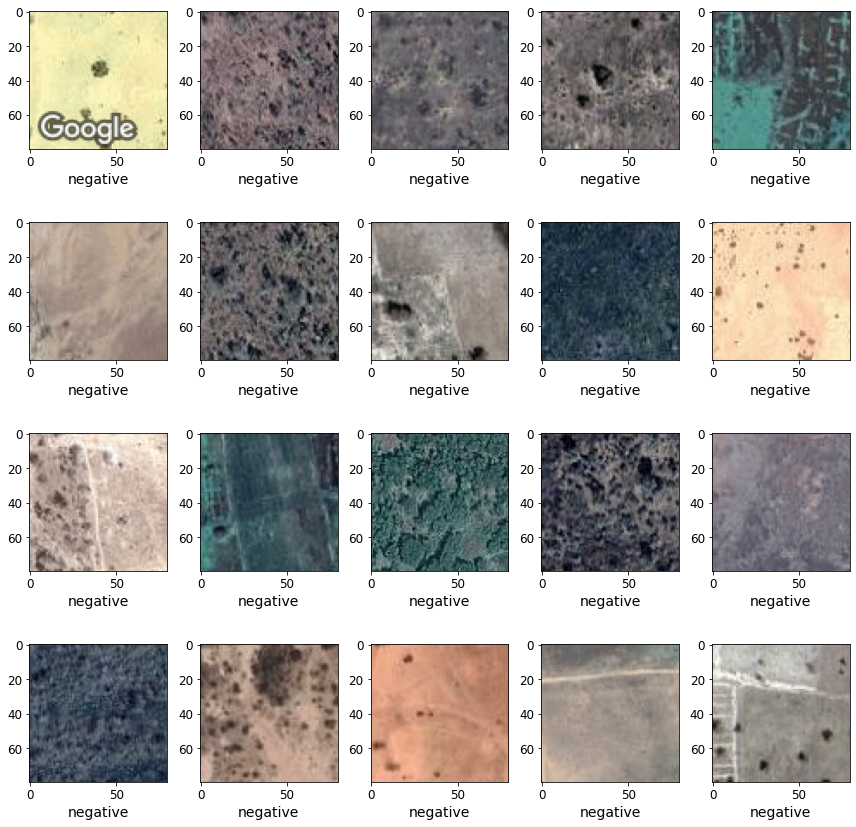

In [ ]:
#print a random sample of 20 images
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
list_images= random.sample(range(1, len(labels_arr)), 20)

plt.figure(figsize=(12,12))
for index in range(len(list_images)):
  x = list_images[index]
  images= tot_dataset[x]
  plt.subplot(4, 5, index+1)
  plt.imshow(images)
  plt.xlabel(labels_arr[x])
plt.tight_layout()
plt.show()

#Train Wavelet CNN

In [ ]:
# batch operation usng tensor slice
def WaveletTransformAxisY(batch_img):
    odd_img  = batch_img[:,0::2]
    even_img = batch_img[:,1::2]
    L = (odd_img + even_img) / 2.0
    H = K.abs(odd_img - even_img)
    return L, H

def WaveletTransformAxisX(batch_img):
    # transpose + fliplr
    tmp_batch = K.permute_dimensions(batch_img, [0, 2, 1])[:,:,::-1]
    _dst_L, _dst_H = WaveletTransformAxisY(tmp_batch)
    # transpose + flipud
    dst_L = K.permute_dimensions(_dst_L, [0, 2, 1])[:,::-1,...]
    dst_H = K.permute_dimensions(_dst_H, [0, 2, 1])[:,::-1,...]
    return dst_L, dst_H


In [ ]:
def Wavelet(batch_image):
    # make channel first image
    batch_image = K.permute_dimensions(batch_image, [0, 3, 1, 2])
    r = batch_image[:,0]
    g = batch_image[:,1]
    b = batch_image[:,2]

    # level 1 decomposition
    wavelet_L, wavelet_H = WaveletTransformAxisY(r)
    r_wavelet_LL, r_wavelet_LH = WaveletTransformAxisX(wavelet_L)
    r_wavelet_HL, r_wavelet_HH = WaveletTransformAxisX(wavelet_H)

    wavelet_L, wavelet_H = WaveletTransformAxisY(g)
    g_wavelet_LL, g_wavelet_LH = WaveletTransformAxisX(wavelet_L)
    g_wavelet_HL, g_wavelet_HH = WaveletTransformAxisX(wavelet_H)

    wavelet_L, wavelet_H = WaveletTransformAxisY(b)
    b_wavelet_LL, b_wavelet_LH = WaveletTransformAxisX(wavelet_L)
    b_wavelet_HL, b_wavelet_HH = WaveletTransformAxisX(wavelet_H)

    wavelet_data = [r_wavelet_LL, r_wavelet_LH, r_wavelet_HL, r_wavelet_HH, 
                    g_wavelet_LL, g_wavelet_LH, g_wavelet_HL, g_wavelet_HH,
                    b_wavelet_LL, b_wavelet_LH, b_wavelet_HL, b_wavelet_HH]
    transform_batch = K.stack(wavelet_data, axis=1)

    # level 2 decomposition
    wavelet_L2, wavelet_H2 = WaveletTransformAxisY(r_wavelet_LL)
    r_wavelet_LL2, r_wavelet_LH2 = WaveletTransformAxisX(wavelet_L2)
    r_wavelet_HL2, r_wavelet_HH2 = WaveletTransformAxisX(wavelet_H2)

    wavelet_L2, wavelet_H2 = WaveletTransformAxisY(g_wavelet_LL)
    g_wavelet_LL2, g_wavelet_LH2 = WaveletTransformAxisX(wavelet_L2)
    g_wavelet_HL2, g_wavelet_HH2 = WaveletTransformAxisX(wavelet_H2)

    wavelet_L2, wavelet_H2 = WaveletTransformAxisY(b_wavelet_LL)
    b_wavelet_LL2, b_wavelet_LH2 = WaveletTransformAxisX(wavelet_L2)
    b_wavelet_HL2, b_wavelet_HH2 = WaveletTransformAxisX(wavelet_H2)


    wavelet_data_l2 = [r_wavelet_LL2, r_wavelet_LH2, r_wavelet_HL2, r_wavelet_HH2, 
                    g_wavelet_LL2, g_wavelet_LH2, g_wavelet_HL2, g_wavelet_HH2,
                    b_wavelet_LL2, b_wavelet_LH2, b_wavelet_HL2, b_wavelet_HH2]
    transform_batch_l2 = K.stack(wavelet_data_l2, axis=1)

    # level 3 decomposition
    wavelet_L3, wavelet_H3 = WaveletTransformAxisY(r_wavelet_LL2)
    r_wavelet_LL3, r_wavelet_LH3 = WaveletTransformAxisX(wavelet_L3)
    r_wavelet_HL3, r_wavelet_HH3 = WaveletTransformAxisX(wavelet_H3)

    wavelet_L3, wavelet_H3 = WaveletTransformAxisY(g_wavelet_LL2)
    g_wavelet_LL3, g_wavelet_LH3 = WaveletTransformAxisX(wavelet_L3)
    g_wavelet_HL3, g_wavelet_HH3 = WaveletTransformAxisX(wavelet_H3)

    wavelet_L3, wavelet_H3 = WaveletTransformAxisY(b_wavelet_LL2)
    b_wavelet_LL3, b_wavelet_LH3 = WaveletTransformAxisX(wavelet_L3)
    b_wavelet_HL3, b_wavelet_HH3 = WaveletTransformAxisX(wavelet_H3)

    wavelet_data_l3 = [r_wavelet_LL3, r_wavelet_LH3, r_wavelet_HL3, r_wavelet_HH3, 
                    g_wavelet_LL3, g_wavelet_LH3, g_wavelet_HL3, g_wavelet_HH3,
                    b_wavelet_LL3, b_wavelet_LH3, b_wavelet_HL3, b_wavelet_HH3]
    transform_batch_l3 = K.stack(wavelet_data_l3, axis=1)

    # level 4 decomposition
    wavelet_L4, wavelet_H4 = WaveletTransformAxisY(r_wavelet_LL3)
    r_wavelet_LL4, r_wavelet_LH4 = WaveletTransformAxisX(wavelet_L4)
    r_wavelet_HL4, r_wavelet_HH4 = WaveletTransformAxisX(wavelet_H4)

    wavelet_L4, wavelet_H4 = WaveletTransformAxisY(g_wavelet_LL3)
    g_wavelet_LL4, g_wavelet_LH4 = WaveletTransformAxisX(wavelet_L4)
    g_wavelet_HL4, g_wavelet_HH4 = WaveletTransformAxisX(wavelet_H4)

    wavelet_L3, wavelet_H3 = WaveletTransformAxisY(b_wavelet_LL3)
    b_wavelet_LL4, b_wavelet_LH4 = WaveletTransformAxisX(wavelet_L4)
    b_wavelet_HL4, b_wavelet_HH4 = WaveletTransformAxisX(wavelet_H4)


    wavelet_data_l4 = [r_wavelet_LL4, r_wavelet_LH4, r_wavelet_HL4, r_wavelet_HH4, 
                    g_wavelet_LL4, g_wavelet_LH4, g_wavelet_HL4, g_wavelet_HH4,
                    b_wavelet_LL4, b_wavelet_LH4, b_wavelet_HL4, b_wavelet_HH4]
    transform_batch_l4 = K.stack(wavelet_data_l4, axis=1)

    # print('shape before')
    # print(transform_batch.shape)
    # print(transform_batch_l2.shape)
    # print(transform_batch_l3.shape)
    # print(transform_batch_l4.shape)

    decom_level_1 = K.permute_dimensions(transform_batch, [0, 2, 3, 1])
    decom_level_2 = K.permute_dimensions(transform_batch_l2, [0, 2, 3, 1])
    decom_level_3 = K.permute_dimensions(transform_batch_l3, [0, 2, 3, 1])
    decom_level_4 = K.permute_dimensions(transform_batch_l4, [0, 2, 3, 1])
    
    # print('shape after')
    # print(decom_level_1.shape)
    # print(decom_level_2.shape)
    # print(decom_level_3.shape)
    # print(decom_level_4.shape)
    return [decom_level_1, decom_level_2, decom_level_3, decom_level_4]


def Wavelet_out_shape(input_shapes):
    # print('in to shape')
    return [tuple([None, 112, 112, 12]), tuple([None, 56, 56, 12]), 
            tuple([None, 28, 28, 12]), tuple([None, 14, 14, 12])]

In [ ]:
img_batch = K.zeros(shape=(10, 80, 80, 3), dtype='float32')

In [ ]:
def get_wavelet_cnn_model():

    input_shape = 80, 80, 4

    input_ = Input(input_shape, name='the_input')
    # wavelet = Lambda(Wavelet, name='wavelet')
    wavelet = Lambda(Wavelet, Wavelet_out_shape, name='wavelet')
    input_l1, input_l2, input_l3, input_l4 = wavelet(input_)
    # print(input_l1)
    # print(input_l2)
    # print(input_l3)
    # print(input_l4)
    # level one decomposition starts
    conv_1 = Conv2D(64, kernel_size=(3, 3), padding='same', name='conv_1')(input_l1)
    norm_1 = BatchNormalization(name='norm_1')(conv_1)
    relu_1 = Activation('sigmoid', name='relu_1')(norm_1)

    conv_1_2 = Conv2D(64, kernel_size=(3, 3), strides=(2, 2), padding='same', name='conv_1_2')(relu_1)
    norm_1_2 = BatchNormalization(name='norm_1_2')(conv_1_2)
    relu_1_2 = Activation('sigmoid', name='relu_1_2')(norm_1_2)

    # level two decomposition starts
    conv_a = Conv2D(filters=64, kernel_size=(3, 3), padding='same', name='conv_a')(input_l2)
    norm_a = BatchNormalization(name='norm_a')(conv_a)
    relu_a = Activation('sigmoid', name='relu_a')(norm_a)

    # concate level one and level two decomposition
    concate_level_2 = concatenate([relu_1_2, relu_a])
    conv_2 = Conv2D(128, kernel_size=(3, 3), padding='same', name='conv_2')(concate_level_2)
    norm_2 = BatchNormalization(name='norm_2')(conv_2)
    relu_2 = Activation('sigmoid', name='relu_2')(norm_2)

    conv_2_2 = Conv2D(128, kernel_size=(3, 3), strides=(2, 2), padding='same', name='conv_2_2')(relu_2)
    norm_2_2 = BatchNormalization(name='norm_2_2')(conv_2_2)
    relu_2_2 = Activation('sigmoid', name='relu_2_2')(norm_2_2)

    # level three decomposition starts 
    conv_b = Conv2D(filters=64, kernel_size=(3, 3), padding='same', name='conv_b')(input_l3)
    norm_b = BatchNormalization(name='norm_b')(conv_b)
    relu_b = Activation('sigmoid', name='relu_b')(norm_b)

    conv_b_2 = Conv2D(128, kernel_size=(3, 3), padding='same', name='conv_b_2')(relu_b)
    norm_b_2 = BatchNormalization(name='norm_b_2')(conv_b_2)
    relu_b_2 = Activation('sigmoid', name='relu_b_2')(norm_b_2)

    # concate level two and level three decomposition 
    concate_level_3 = concatenate([relu_2_2, relu_b_2])
    conv_3 = Conv2D(256, kernel_size=(3, 3), padding='same', name='conv_3')(concate_level_3)
    drop_3 = Dropout(0.5, name='drop_3')(conv_3) # FIRST AMENDMENT
    norm_3 = BatchNormalization(name='nomr_3')(drop_3)
    relu_3 = Activation('sigmoid', name='relu_3')(norm_3)

    conv_3_2 = Conv2D(256, kernel_size=(3, 3), strides=(2, 2), padding='same', name='conv_3_2')(relu_3)
    norm_3_2 = BatchNormalization(name='norm_3_2')(conv_3_2)
    relu_3_2 = Activation('sigmoid', name='relu_3_2')(norm_3_2)

    # level four decomposition start
    conv_c = Conv2D(64, kernel_size=(3, 3), padding='same', name='conv_c')(input_l4)
    norm_c = BatchNormalization(name='norm_c')(conv_c)
    relu_c = Activation('sigmoid', name='relu_c')(norm_c)

    conv_c_2 = Conv2D(256, kernel_size=(3, 3), padding='same', name='conv_c_2')(relu_c)
    norm_c_2 = BatchNormalization(name='norm_c_2')(conv_c_2)
    relu_c_2 = Activation('sigmoid', name='relu_c_2')(norm_c_2)

    conv_c_3 = Conv2D(256, kernel_size=(3, 3), padding='same', name='conv_c_3')(relu_c_2)
    norm_c_3 = BatchNormalization(name='norm_c_3')(conv_c_3)
    relu_c_3 = Activation('relu', name='relu_c_3')(norm_c_3)

    # concate level level three and level four decomposition
    concate_level_4 = concatenate([relu_3_2, relu_c_3])
    conv_4 = Conv2D(256, kernel_size=(3, 3), padding='same', name='conv_4')(concate_level_4)
    norm_4 = BatchNormalization(name='norm_4')(conv_4)
    relu_4 = Activation('sigmoid', name='relu_4')(norm_4)
    drop_4 = Dropout(0.5, name='drop_4')(relu_4)#ADDED

    conv_4_2 = Conv2D(256, kernel_size=(3, 3), strides=(2, 2), padding='same', name='conv_4_2')(drop_4)
    norm_4_2 = BatchNormalization(name='norm_4_2')(conv_4_2)
    relu_4_2 = Activation('sigmoid', name='relu_4_2')(norm_4_2) #CHANGED FROM RELU TO SIGMOID

    conv_5_1 = Conv2D(128, kernel_size=(3, 3), padding='same', name='conv_5_1')(relu_4_2)
    norm_5_1 = BatchNormalization(name='norm_5_1')(conv_5_1)
    relu_5_1 = Activation('sigmoid', name='relu_5_1')(norm_5_1)

    pool_5_1 = AveragePooling2D(pool_size=(7, 7), strides=1, padding='same', name='avg_pool_5_1')(relu_5_1)
    flat_5_1 = Flatten(name='flat_5_1')(pool_5_1) 

    fc_5 = Dense(2048, name='fc_5')(flat_5_1)
    norm_5 = BatchNormalization(name='norm_5')(fc_5)
    relu_5 = Activation('sigmoid', name='relu_5')(norm_5)
    drop_5 = Dropout(0.5, name='drop_5')(relu_5)

    fc_6 = Dense(2048, name='fc_6')(drop_5)
    norm_6 = BatchNormalization(name='norm_6')(fc_6)
    relu_6 = Activation('sigmoid', name='relu_6')(norm_6)
    drop_6 = Dropout(0.5, name='drop_6')(relu_6)

    output = Dense(2, activation='softmax', name='fc_7')(drop_6)

    model = Model(inputs=input_, outputs=output)
    model.summary()
    plot_model(model, to_file='wavelet_cnn_0.5.png')

    return model

In [ ]:
model = get_wavelet_cnn_model()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input (InputLayer)          [(None, 80, 80, 4)]  0                                            
__________________________________________________________________________________________________
wavelet (Lambda)                [(None, 40, 40, 12), 0           the_input[0][0]                  
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, 40, 40, 64)   6976        wavelet[0][0]                    
__________________________________________________________________________________________________
norm_1 (BatchNormalization)     (None, 40, 40, 64)   256         conv_1[0][0]                     
_______________________________________________________________________________________

In [ ]:
(trainX, validX, trainY, validY) = train_test_split(dataset_arr, labels_lb,
	test_size=0.2, stratify=labels_lb, random_state=42)

In [ ]:
#lr_schedule=keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.001, decay_steps=10000, decay_rate=0.5)

opt = keras.optimizers.Adam() #(lr_schedule)

loss=tf.keras.losses.CategoricalCrossentropy(name="categorical_crossentropy")
model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])


#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
class_weight = {0: 0.0031247040999905495,
                1: 0.9968752959000095}

#earlystop = EarlyStopping(patience=10)

history_sequential = model.fit(trainX, trainY, epochs=200, #batch_size=3,
                    validation_data=(validX, validY), class_weight=class_weight)

Epoch 1/200
529/529 [==============================] - 12s 22ms/step - loss: 0.0064 - accuracy: 0.7526 - val_loss: 0.7535 - val_accuracy: 0.7704
Epoch 2/200
529/529 [==============================] - 11s 21ms/step - loss: 0.0043 - accuracy: 0.7945 - val_loss: 0.2734 - val_accuracy: 0.9039
Epoch 3/200
529/529 [==============================] - 11s 21ms/step - loss: 0.0048 - accuracy: 0.8169 - val_loss: 1.8606 - val_accuracy: 0.8211
Epoch 4/200
529/529 [==============================] - 11s 21ms/step - loss: 0.0037 - accuracy: 0.8187 - val_loss: 0.5451 - val_accuracy: 0.7278
Epoch 5/200
529/529 [==============================] - 11s 21ms/step - loss: 0.0051 - accuracy: 0.8439 - val_loss: 0.4703 - val_accuracy: 0.7025
Epoch 6/200
529/529 [==============================] - 11s 21ms/step - loss: 0.0034 - accuracy: 0.8423 - val_loss: 2.0518 - val_accuracy: 0.6293
Epoch 7/200
529/529 [==============================] - 11s 21ms/step - loss: 0.0048 - accuracy: 0.8531 - val_loss: 1.6283 - val_ac

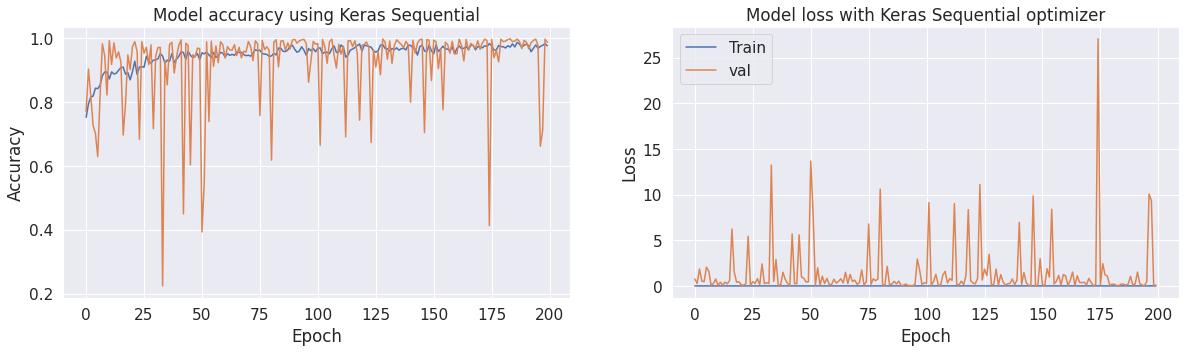

In [ ]:
fig = plt.figure(figsize=(20,5))
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)


ax1.plot(history_sequential.history['accuracy'])
ax1.plot(history_sequential.history['val_accuracy'])
ax1.set_title('Model accuracy using Keras Sequential')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
plt.legend(['Train', 'val'], loc='upper left')

ax2.plot(history_sequential.history['loss'])
ax2.plot(history_sequential.history['val_loss'])
ax2.set_title('Model loss with Keras Sequential optimizer')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'val'], loc='upper left')
plt.show()

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      4212
         1.0       0.19      0.92      0.32        13

    accuracy                           0.99      4225
   macro avg       0.60      0.96      0.65      4225
weighted avg       1.00      0.99      0.99      4225



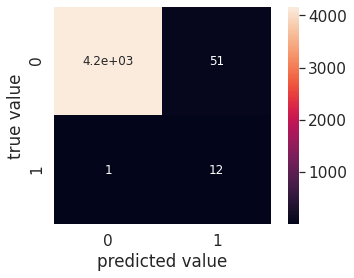

In [ ]:
predict_on_testset(model, validX, validY)

No handles with labels found to put in legend.


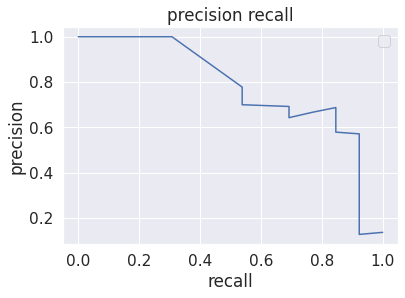

In [ ]:
predictions=model.predict(validX)
preds=predictions[:,1]
true_labels=validY[:,1]

precision, recall, thresholds = precision_recall_curve(true_labels,preds)

%matplotlib inline
plt.figure(1)
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision recall')
plt.legend(loc='best')
plt.show()

# Save the model as a json file on local directory

In [ ]:
model_json_new = model.to_json()

with open("/content/drive/My Drive/model.json", "w") as json_file:
    json_file.write(model_json_new)

# serialize weights to HDF5
model.save_weights("/content/drive/My Drive/model_new.h5")
print("Saved model to disk")

Saved model to disk
